<a href="https://colab.research.google.com/github/SiyiGit/github_actions/blob/main/CNN_model_04302024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install opendatasets
!pip install opendatasets

In [2]:
#import libraries
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import seaborn as sns

In [3]:
#kaggle dataset download
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alicjasosialuk
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [01:40<00:00, 28.7MB/s]


In [ ]:
#just for info{"username":"alicjasosialuk","key":"fa69bfa4724b0a10006ba687db303759"}

In [4]:
#path to datasets
data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
data_dir_val = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
#data_dir_test = './new-plant-diseases-dataset/test/test'

In [5]:
## Defining batch specfications
batch_size = 200
img_height = 128
img_width = 128

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, MaxPooling2D, Conv2D, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn import metrics

In [7]:
# split the train set as train and validation (20%)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest',
                                  validation_split=0.2)
train_data = train_datagen.flow_from_directory(data_dir_train,
                                               target_size=(img_height, img_width),
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset='training', # set as training data
                                               shuffle=True)

val_data = train_datagen.flow_from_directory(data_dir_train, # same directory as training data
                                             target_size=(img_height, img_width),
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             subset='validation', # set as validation data
                                             shuffle=True)

Found 56251 images belonging to 38 classes.
Found 14044 images belonging to 38 classes.


In [8]:
## loading test set from validation folders
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(data_dir_val,
                                            batch_size=batch_size,
                                            target_size=(img_height, img_width),
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 17572 images belonging to 38 classes.


In [9]:
## Defining model layers
inputs = Input(shape = (img_width, img_height,3), name = "Input")

first_layer = Conv2D(filters = 32,
                     kernel_size = 3,
                     padding = 'valid',
                     activation = 'relu')

second_layer = MaxPooling2D(pool_size = (2, 2))

third_layer = Conv2D(filters = 64,
                     kernel_size = 3,
                     padding = 'valid',
                     activation = 'relu')

fourth_layer = MaxPooling2D(pool_size = (2, 2))

fifth_layer = Dropout(rate = 0.2)

sixth_layer = Flatten()

seventh_layer = Dense(units = 256,
                    activation = 'relu')

eighth_layer = Dense(units = 64,
                    activation = 'relu')


output_layer = Dense(units = 38,
                     activation='softmax')

x=first_layer(inputs)
x=second_layer(x)
x=third_layer(x)
x=fourth_layer(x)
x=fifth_layer(x)
x=sixth_layer(x)
x=seventh_layer(x)
x=eighth_layer(x)
outputs=output_layer(x)

cnn_model = Model(inputs = inputs, outputs = outputs)



In [10]:
cnn_model.compile(loss='categorical_crossentropy', # loss function
                  optimizer='adam',                # gradien descent algorithm
                  metrics=['accuracy'])           # accuracy metric)


In [11]:
print(cnn_model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0     

In [12]:
training_history = cnn_model.fit(train_data,
                                 validation_data= val_data,
                                 epochs = 25,
                                 batch_size = 100)

Epoch 1/25
 87/282 [========>.....................] - ETA: 21:15 - loss: 3.3760 - accuracy: 0.1002

KeyboardInterrupt: 

In [ ]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

train_loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

#learning_rate = training_history.history['lr']

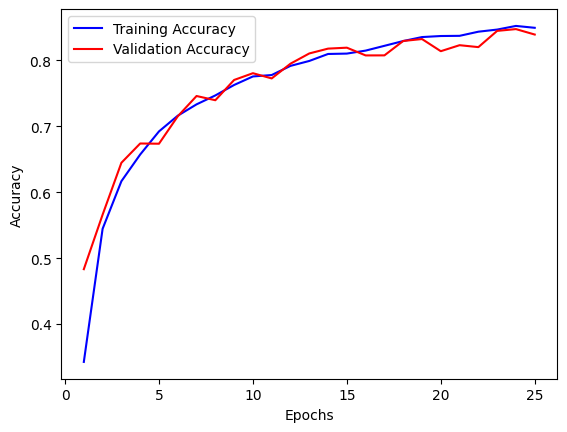

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.plot(np.arange(1 , 26, 1),
         train_acc,
         label = 'Training Accuracy',
         color = 'blue')


plt.plot(np.arange(1 , 26, 1),
         val_acc,
         label = 'Validation Accuracy',
         color = 'red')

plt.legend()

plt.show()

In [ ]:
test_pred = cnn_model.predict(test_data)

test_pred_class = test_pred.argmax(axis = 1)
y_test_class =test_data.argmax(axis = 1)

print(metrics.classification_report(y_test_class, test_pred_class))

88/88 [==============================] - 41s 464ms/step


AttributeError: 'DirectoryIterator' object has no attribute 'argmax'

In [ ]:
test_pred = cnn_model.predict(test_data)

88/88 [==============================] - 42s 468ms/step


In [ ]:
test_pred


array([[9.9618715e-01, 3.6149315e-05, 9.2603128e-13, ..., 5.4426712e-14,
        1.0132762e-09, 2.6645694e-10],
       [9.9944127e-01, 8.6786213e-06, 3.2507490e-13, ..., 6.2945370e-14,
        1.7468477e-09, 2.4457614e-10],
       [9.7381687e-01, 2.5917383e-02, 2.7429995e-14, ..., 3.4160895e-21,
        1.0083886e-07, 1.5281522e-09],
       ...,
       [9.6719964e-07, 1.0288269e-17, 1.1506403e-06, ..., 1.5146003e-09,
        1.5351506e-10, 9.9947828e-01],
       [8.6742162e-08, 1.1878902e-15, 1.2048655e-07, ..., 8.8173696e-12,
        1.4723730e-12, 9.9998724e-01],
       [1.7753931e-16, 9.7693349e-13, 1.3154929e-20, ..., 1.9174976e-17,
        1.1051427e-10, 9.9999440e-01]], dtype=float32)

In [ ]:
test_data

In [ ]:
cnn_model.save("model.h5")
from tensorflow.keras.models import load_model

cnn_model = load_model("/kaggle/working/model.h5")